In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Class'], dtype='object')

In [15]:
X_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Y_columns = ['variety']

In [16]:
df.Class.unique()

array([0, 1], dtype=int64)

In [17]:
df.Class

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: Class, Length: 100, dtype: int64

In [18]:
def normalization(x, axis = -1, order = 2):
    l2 = np.atleast_1d(np.linalg.norm(x,order,axis))
    l2[l2 == 0] = 1
    return x / np.expand_dims(l2, axis)

def one_hot_encoding(y):
    columns = np.amax(y) + 1
    rows = len(y)
    array = np.zeros((rows , columns))
    for i in range(rows):
        array[i, y[i]] = 1
    return array
    
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * ( 1 - sigmoid(x))

In [20]:
X = pd.DataFrame(df, columns = X_columns)
X = X.values
X = normalization(X)
X[:5]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ]])

In [21]:
Y = pd.DataFrame(df, columns = Y_columns)
Y = Y.values
Y = Y.flatten()
Y = one_hot_encoding(Y)
Y[:5]

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [30]:
def weight_init(in_channel, out_channel):
    return np.random.random((in_channel, out_channel))

def calculate_loss(error):
    return np.mean(abs(error))

In [60]:
def mlp_training(X,Y, lr = 0.1,epochs = 50, hidden_dims = [10,10]):
    w0,w1, w2 = weight_init(4,hidden_dims[0]),weight_init(hidden_dims[1],hidden_dims[1]),weight_init(hidden_dims[1],3)
    losses, acc = [], []
    
    for epoch in range(epochs):
        
        input_layer = X
        hidden1 = sigmoid(np.dot(input_layer,w0))
        hidden2 = sigmoid(np.dot(hidden1, w1))
        output_layer = sigmoid(np.dot(hidden2, w2))
        
        output_layer_error = Y - output_layer
        output_layer_delta = output_layer_error * sigmoid_derivative(output_layer)
        
        hidden2_error = output_layer_delta.dot(w2.T)
        hidden2_delta = hidden2_error * sigmoid_derivative(hidden2)
        
        hidden1_error = hidden2_delta.dot(w1.T)
        hidden1_delta = hidden1_error * sigmoid_derivative(hidden1)
        
        w2 += hidden2.T.dot(output_layer_delta) * lr
        w1 += hidden1.T.dot(hidden2_delta) * lr
        w0 += input_layer.T.dot(hidden1_delta) * lr
    
        loss = np.mean(abs(output_layer_error))
        accuracy = (1 - loss) * 100
        losses.append(loss)
        acc.append(accuracy)
        if epoch % 100 == 0:
            print(f"{epoch}/{epochs}: Loss = {loss} \t Accuracy = {accuracy}")
    print(f"{epoch}/{epochs}: Loss = {loss} \t Accuracy = {accuracy}")
    return [losses, acc]
        

In [61]:
history = mlp_training(X,Y, lr = 0.01, epochs = 10000, hidden_dims = [100,100])

0/10000: Loss = 0.6666666666666666 	 Accuracy = 33.333333333333336
100/10000: Loss = 0.5733304835973423 	 Accuracy = 42.66695164026577
200/10000: Loss = 0.5206609615972863 	 Accuracy = 47.93390384027138
300/10000: Loss = 0.502291418284937 	 Accuracy = 49.770858171506305
400/10000: Loss = 0.4932287687327813 	 Accuracy = 50.67712312672187
500/10000: Loss = 0.4878351613818909 	 Accuracy = 51.2164838618109
600/10000: Loss = 0.48426883279477606 	 Accuracy = 51.57311672052239
700/10000: Loss = 0.48175234668635936 	 Accuracy = 51.82476533136406
800/10000: Loss = 0.47989195217856834 	 Accuracy = 52.01080478214317
900/10000: Loss = 0.4784522945181574 	 Accuracy = 52.15477054818426
1000/10000: Loss = 0.4772528774140668 	 Accuracy = 52.274712258593325
1100/10000: Loss = 0.4760748651755025 	 Accuracy = 52.39251348244976
1200/10000: Loss = 0.47444780137538717 	 Accuracy = 52.55521986246128
1300/10000: Loss = 0.47079279194452744 	 Accuracy = 52.92072080554726
1400/10000: Loss = 0.4576292389271181 	 

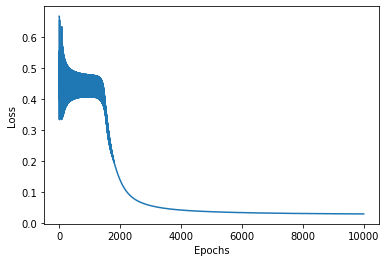

In [62]:
plt.plot(history[0])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

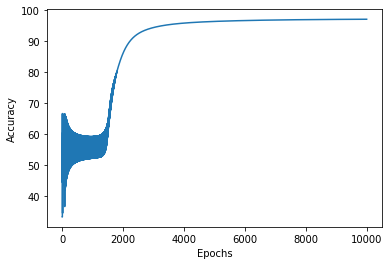

In [63]:
plt.plot(history[1])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [53]:
print(f"Maximum Acccuracy = {max(history[1])}")

Maximum Acccuracy = 97.19843187903973
